# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

## Importing Google Drive

In [1]:
import io
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Libraries 


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models, layers, optimizers, utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Uploading Files from Google Drive

In [3]:
df = pd.read_csv('/content/drive/My Drive/CarPrice_Assignment.csv')
print(df.shape)
print(df.columns)
df.head()

(205, 26)
Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Checking Missing Values


In [4]:
np.sum(pd.isnull(df))

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### Conversion of data to numeric value so our model can understand it. For that we can use either use label encoding or one-hot  encoding but label encoding will be used in this assignment.

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['fueltype'] = labelencoder.fit_transform(df['fueltype'])
df['aspiration'] = labelencoder.fit_transform(df['aspiration'])
df['carbody'] = labelencoder.fit_transform(df['carbody'])
df['drivewheel'] = labelencoder.fit_transform(df['drivewheel'])
df['enginelocation'] = labelencoder.fit_transform(df['enginelocation'])
df['fuelsystem'] = labelencoder.fit_transform(df['fuelsystem']) 
df['enginetype'] = labelencoder.fit_transform(df['enginetype'])
df['cylindernumber'] = labelencoder.fit_transform(df['cylindernumber'])
df['doornumber'] = df['doornumber'].map({'two':2, 'four':4}) # Mapping two to 2 and four to 4 
# We don't care about car name so we are not going to bother it
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,4,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,4,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


# Making Heatmap to find corelations

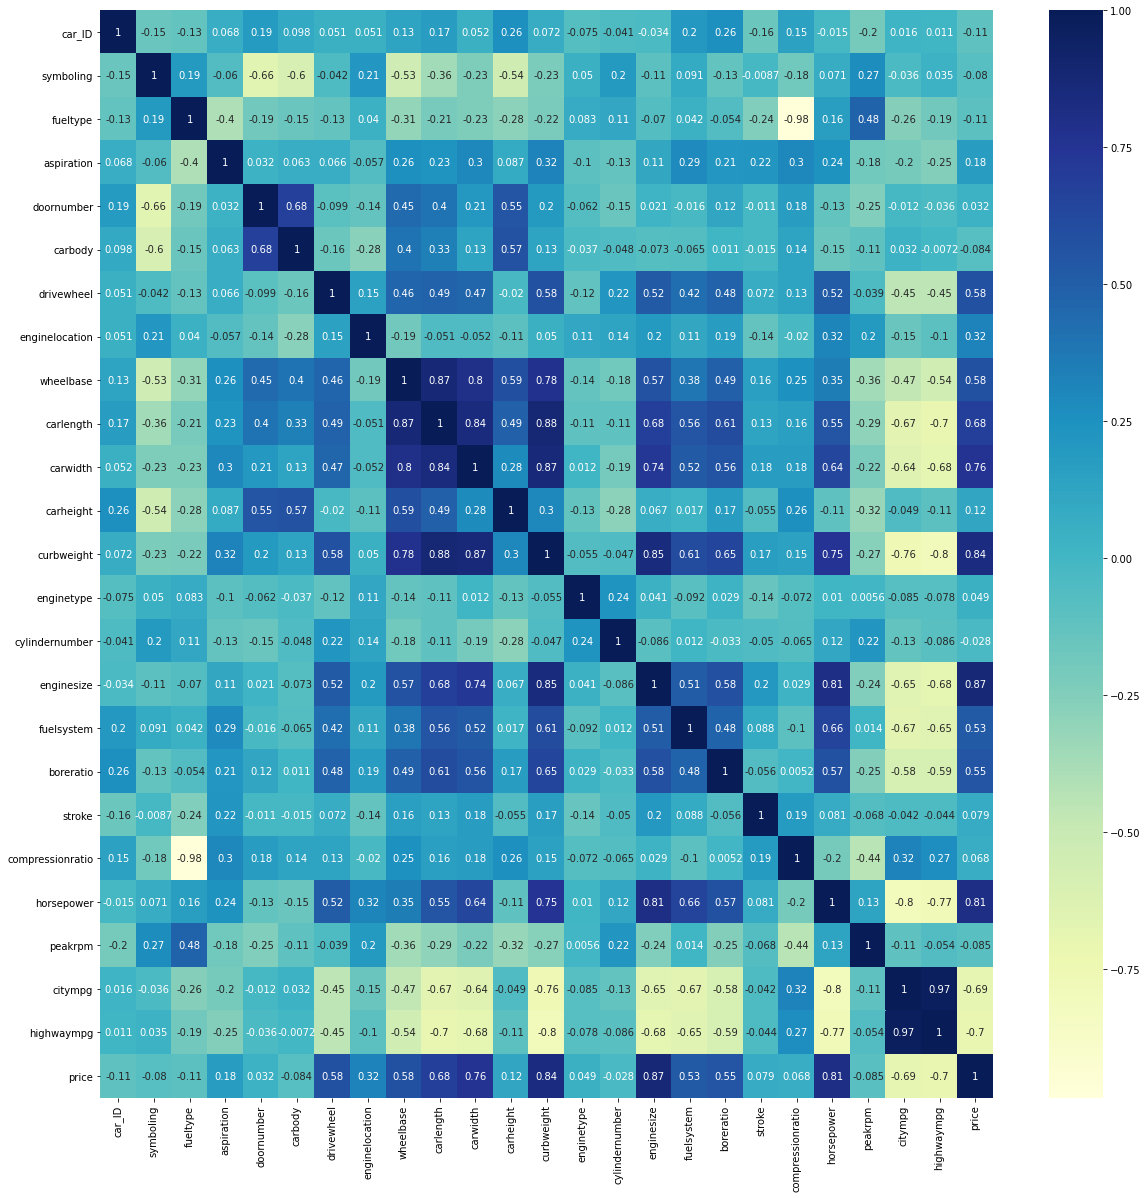

In [7]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="YlGnBu")

### Using the data that is correlated only with price


In [8]:
df = df[['horsepower','boreratio','enginesize','curbweight','carwidth','carlength', 'wheelbase','drivewheel','price','enginelocation', 'fuelsystem']]
print(df.shape)
df.head()


(205, 11)


,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,price,enginelocation,fuelsystem
0,111,3.47,130,2548,64.1,168.8,88.6,2,13495.0,0,5
1,111,3.47,130,2548,64.1,168.8,88.6,2,16500.0,0,5
2,154,2.68,152,2823,65.5,171.2,94.5,2,16500.0,0,5
3,102,3.19,109,2337,66.2,176.6,99.8,1,13950.0,0,5
4,115,3.19,136,2824,66.4,176.6,99.4,0,17450.0,0,5


In [9]:
x = df.drop('price', axis=1)
y = df[['price']]
# Seperating columns
x.head(), y.head()

(   horsepower  boreratio  enginesize  ...  drivewheel  enginelocation  fuelsystem
 0         111       3.47         130  ...           2               0           5
 1         111       3.47         130  ...           2               0           5
 2         154       2.68         152  ...           2               0           5
 3         102       3.19         109  ...           1               0           5
 4         115       3.19         136  ...           0               0           5
 
 [5 rows x 10 columns],      price
 0  13495.0
 1  16500.0
 2  16500.0
 3  13950.0
 4  17450.0)

### Spliting Data using sklearn

In [10]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(x, y, test_size=0.5, random_state = 69)
test_data, val_data, test_labels, val_lables = train_test_split(test_data, test_labels, test_size=0.3, random_state = 69)
train_data.shape, test_data.shape, val_data.shape

((102, 10), (72, 10), (31, 10))

#### Normalizing Dataset

In [11]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data -= mean
train_data /= std
test_data -= mean
test_data /= std
val_data -= mean
val_data /= std

#### Building Model

In [12]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(10, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(8, activation='relu')) 
  model.add(layers.Dense(6))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [13]:
model = build_model()
model.fit(train_data, train_labels, epochs = 500, validation_data=(val_data, val_lables))

Epoch 1/500
4/4 [==============================] - 1s 125ms/step - loss: 241764864.0000 - mae: 13404.4416 - val_loss: 301955200.0000 - val_mae: 15041.2275
Epoch 2/500
4/4 [==============================] - 0s 12ms/step - loss: 225606044.8000 - mae: 12841.4566 - val_loss: 301953888.0000 - val_mae: 15041.1914
Epoch 3/500
4/4 [==============================] - 0s 11ms/step - loss: 221733136.0000 - mae: 12665.5828 - val_loss: 301952768.0000 - val_mae: 15041.1602
Epoch 4/500
4/4 [==============================] - 0s 11ms/step - loss: 235872230.4000 - mae: 13221.3697 - val_loss: 301951904.0000 - val_mae: 15041.1338
Epoch 5/500
4/4 [==============================] - 0s 11ms/step - loss: 236286889.6000 - mae: 13194.8402 - val_loss: 301950976.0000 - val_mae: 15041.1064
Epoch 6/500
4/4 [==============================] - 0s 12ms/step - loss: 207227884.8000 - mae: 12528.0383 - val_loss: 301950016.0000 - val_mae: 15041.0811
Epoch 7/500
4/4 [==============================] - 0s 14ms/step - loss: 238

In [14]:
pred = model.predict(test_data)
pred[0]

array([806.1815 , 853.16724, 961.1719 , 896.2509 , 938.1547 , 752.28815],
      dtype=float32)

Model is not performing. We need to Make layers more dense

#### New Model With  more layers density and add more epochs

In [15]:
def build_new_model():
  model = models.Sequential()
  model.add(layers.Dense(32, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(16, activation='relu')) 
  model.add(layers.Dense(16))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [16]:
model = build_new_model()
model.fit(train_data, train_labels, epochs = 500, validation_data=(val_data, val_lables))

Epoch 1/500
4/4 [==============================] - 1s 55ms/step - loss: 204066128.0000 - mae: 12381.4445 - val_loss: 301956704.0000 - val_mae: 15041.2295
Epoch 2/500
4/4 [==============================] - 0s 13ms/step - loss: 228896112.0000 - mae: 12921.6486 - val_loss: 301954720.0000 - val_mae: 15041.1709
Epoch 3/500
4/4 [==============================] - 0s 13ms/step - loss: 235273968.0000 - mae: 13090.7695 - val_loss: 301952832.0000 - val_mae: 15041.1162
Epoch 4/500
4/4 [==============================] - 0s 12ms/step - loss: 209832464.0000 - mae: 12543.8367 - val_loss: 301950912.0000 - val_mae: 15041.0586
Epoch 5/500
4/4 [==============================] - 0s 12ms/step - loss: 225263084.8000 - mae: 12938.2266 - val_loss: 301948928.0000 - val_mae: 15041.0000
Epoch 6/500
4/4 [==============================] - 0s 12ms/step - loss: 215819990.4000 - mae: 12706.3375 - val_loss: 301946144.0000 - val_mae: 15040.9209
Epoch 7/500
4/4 [==============================] - 0s 14ms/step - loss: 2295

In [17]:
pred = model.predict(test_data)
pred[0]

array([6780.728 , 6187.568 , 6403.4077, 6091.783 , 6101.4   , 6383.724 ,
       6009.318 , 6182.2837, 6373.429 , 5930.1797, 6043.001 , 6377.114 ,
       6518.0537, 6067.5   , 6468.1562, 6291.9746], dtype=float32)